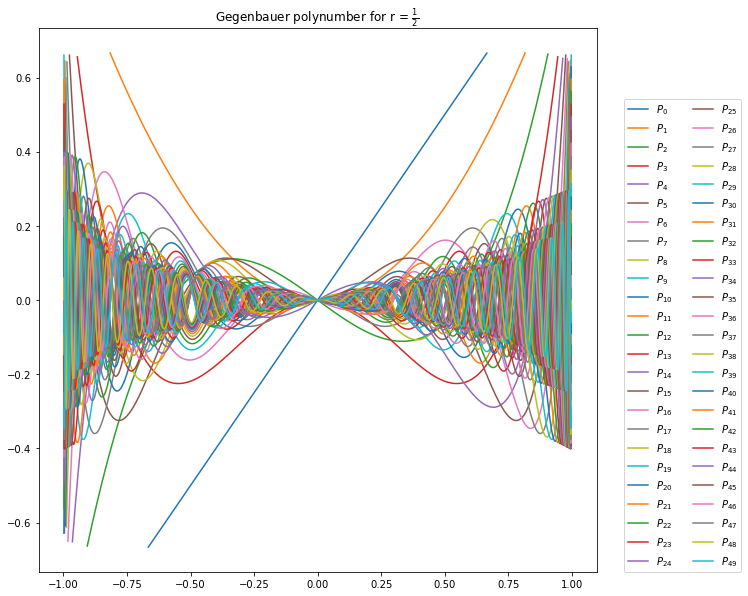

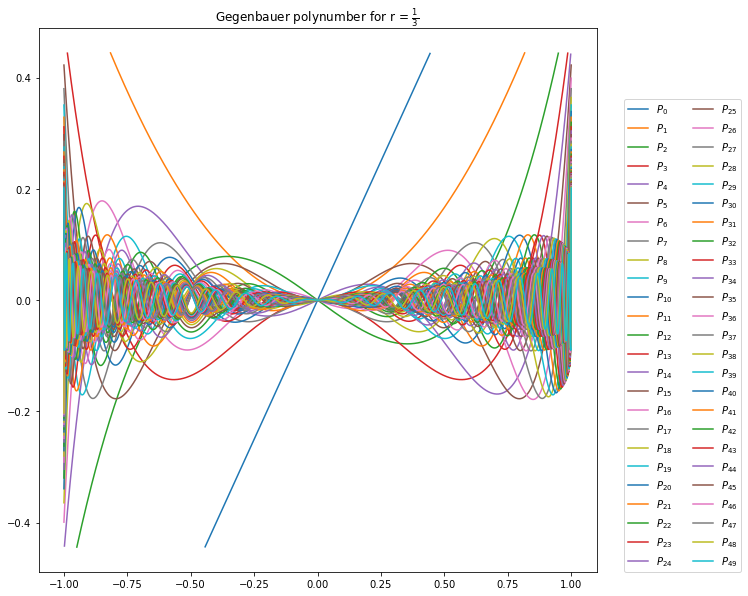

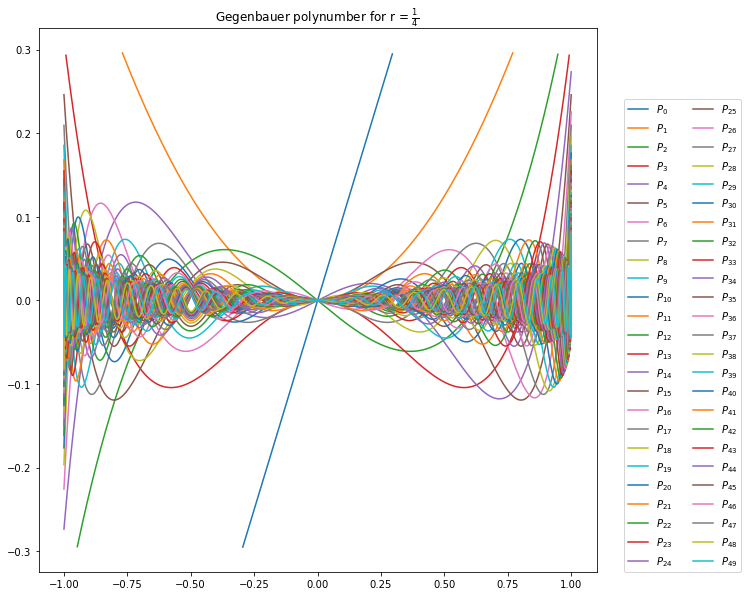

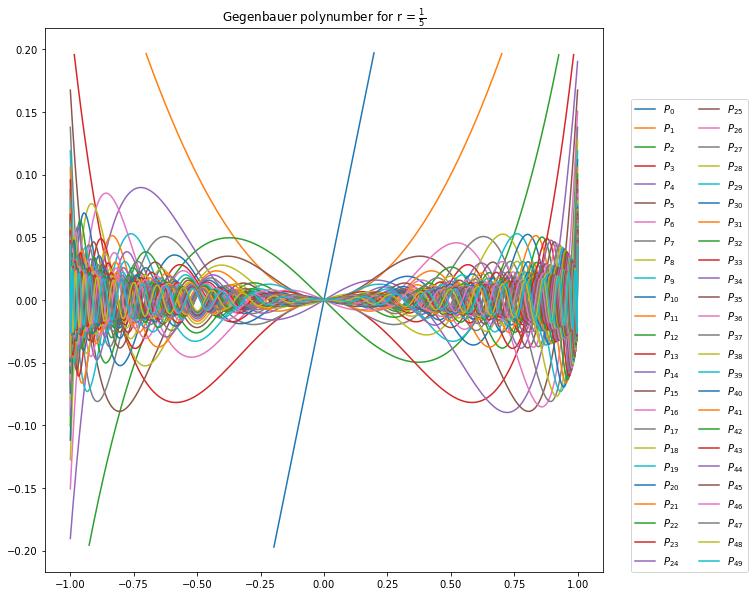

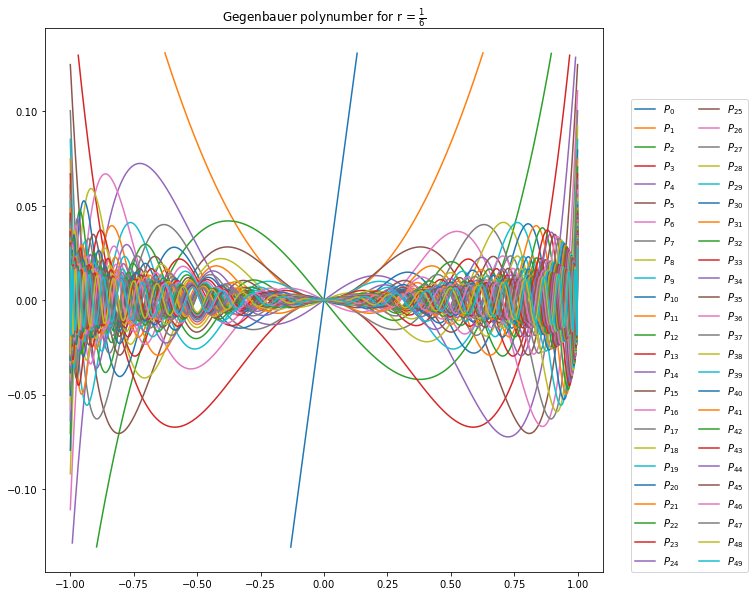

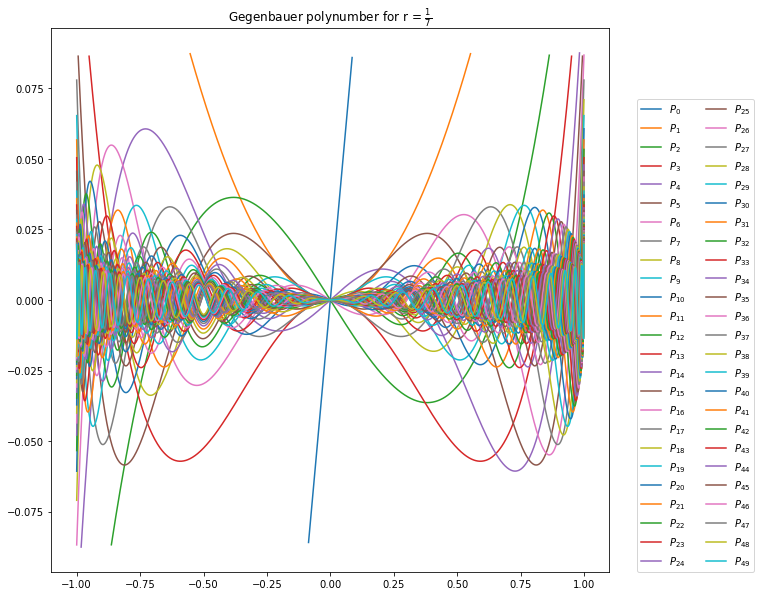

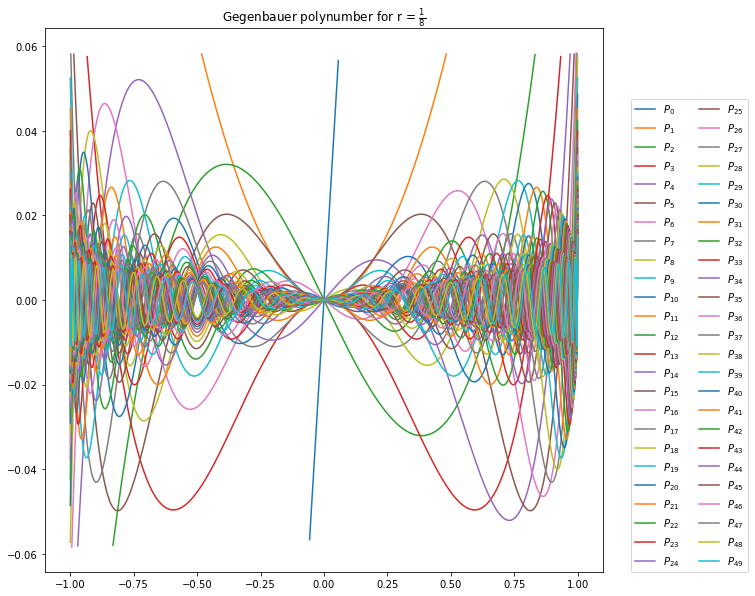

In [1]:
from fractions import *
import matplotlib.pyplot as plt
from math import comb, factorial
from sympy import *

def Ematrix(length):
    return Matrix([[Fraction(factorial(col), 2**col) if col == row else 0 
                    for col in range(length)] for row in range(length)])

def GEmatrix(length):
    return Matrix([[(-1)**((row-col)//2) * Fraction(1, factorial((row-col)//2)) 
                    if (((row - col+1) % 2) and (col <= row)) else 0 
                    for col in range(length)] for row in range(length)])

def Gegenbauer(length, r):
    G = GEmatrix(length + 1) * Ematrix(length + 1)**(-1)
    a = Fraction(1,1)
    for row in range(1, length + 1):
        a *= r + row - 1
        for col in range(row + 1):
            try:
                G[row + col, row - col] *= a
            except:
                break
    return G

def PolyEval(p, x):
    r = Fraction(0,1)
    for k in range(1,len(p)+1):
        i = p[-k]
        r = x * (i + r)
    return r

def getPoints(density, xBounds, yBounds, p):
    i = Fraction(xBounds[1]-xBounds[0], density)
    k = xBounds[0] + Fraction(xBounds[0]-xBounds[1], density)
    x, y = [], []
    for j in range(density+1):
        k += i
        tmp = PolyEval(p, k)
        if (yBounds[0] <= tmp) and (tmp <= yBounds[1]):
            x.append(k)
            y.append(tmp)
    return x, y

density = 1024
xBounds = [Fraction(-1,1), Fraction(1,1)]

length = 50

for n in range(2,9):
    fig = plt.figure(figsize = (10, 10))
    r = Fraction(1, n)
    m = Gegenbauer(length, r)
    yBounds = [Fraction(-2**(n-1),3**(n-1)), Fraction(2**(n-1),3**(n-1))]
    for row in range(length):
        x, y = getPoints(density, xBounds, yBounds, m[row,:])
        plt.plot(x, y, label=r'$P_{'+str(row)+r'}$')
    plt.legend(loc=(1.05, 0), ncol=2)
    plt.title(r'Gegenbauer polynumber for r = $\frac{'+str(r.numerator)+r'}{'+str(r.denominator)+'}$')
    plt.show()
    


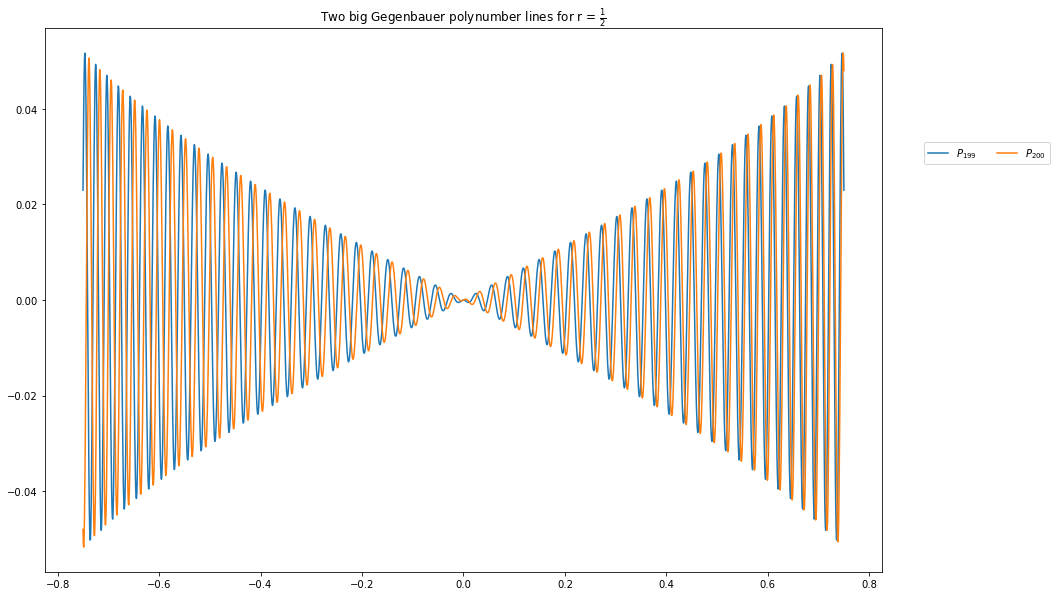

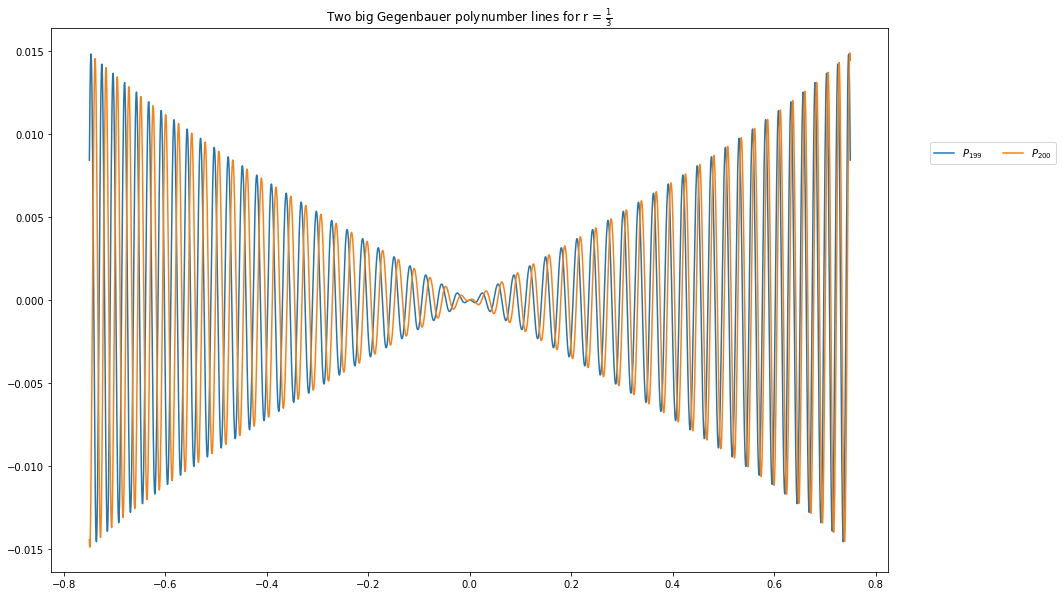

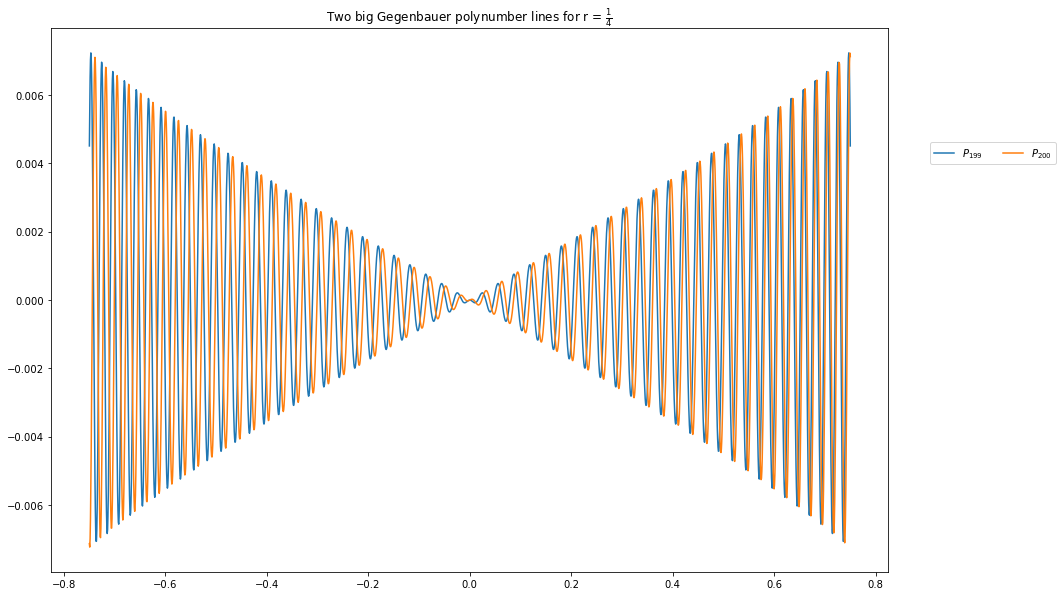

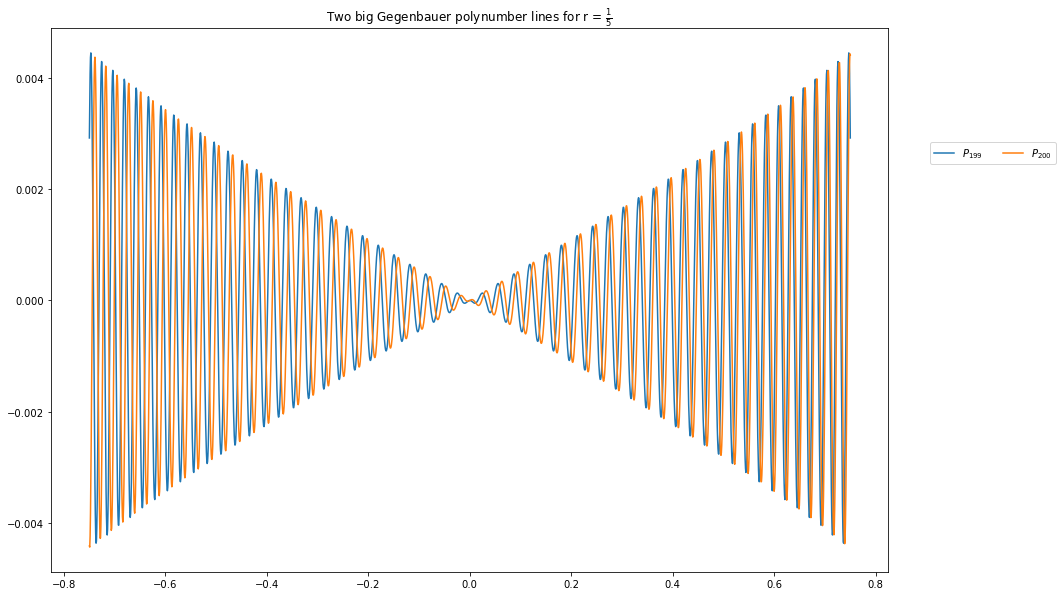

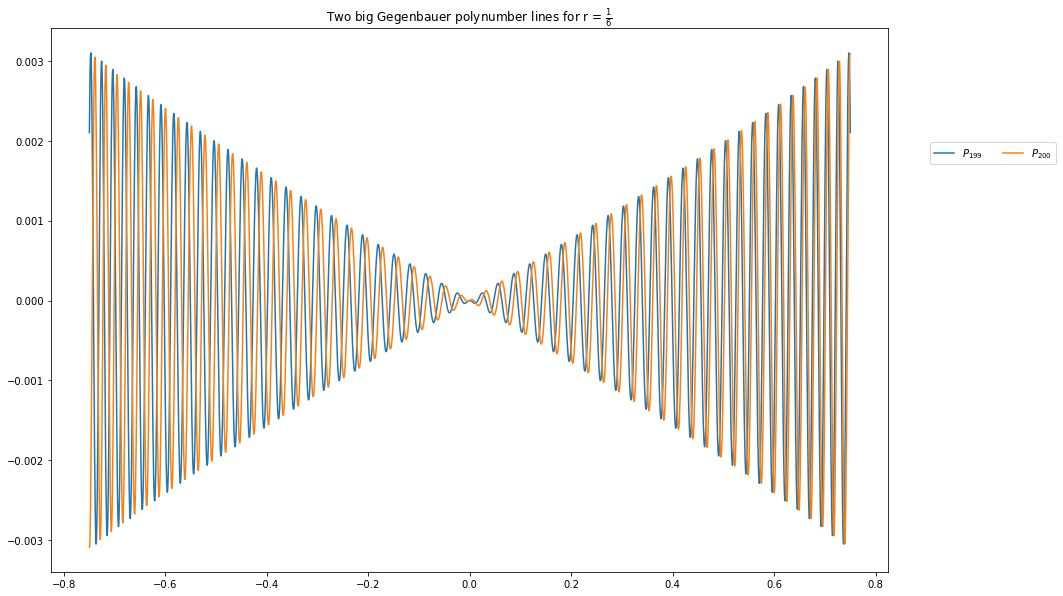

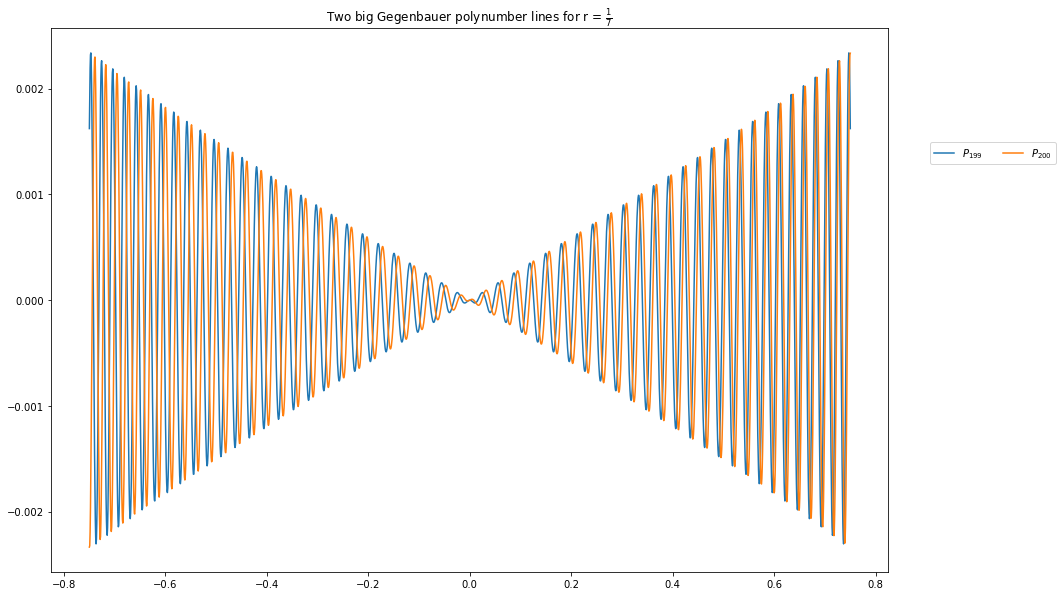

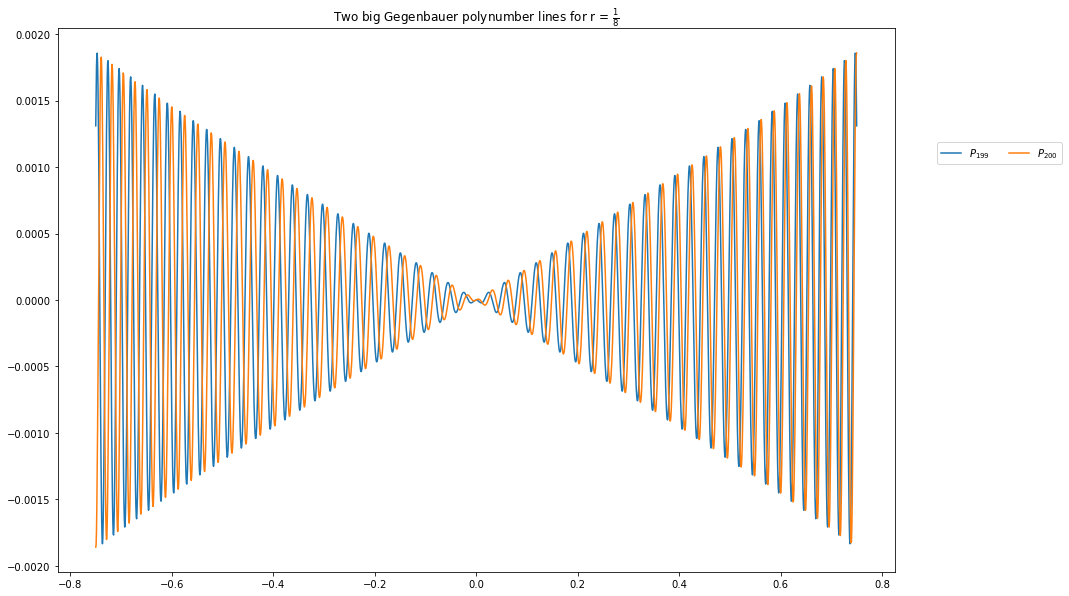

In [2]:
density = 2048
length = 201
xBounds = [Fraction(-3, 4), Fraction(3,4)]
for n in range(2,9):
    fig = plt.figure(figsize = (15, 10))
    r = Fraction(1, n)
    m = Gegenbauer(length, r)
    yBounds = [Fraction(-1, 2**(n-1)), Fraction(1,2**(n-1))]
    for row in range(199, length):
        x, y = getPoints(density, xBounds, yBounds, m[row,:])
        plt.plot(x, y, label=r'$P_{'+str(row)+r'}$')
    plt.legend(loc=(1.05, 0.75), ncol=2)
    plt.title(r'Two big Gegenbauer polynumber lines for r = $\frac{'+str(r.numerator)+r'}{'+str(r.denominator)+'}$')
    plt.show()

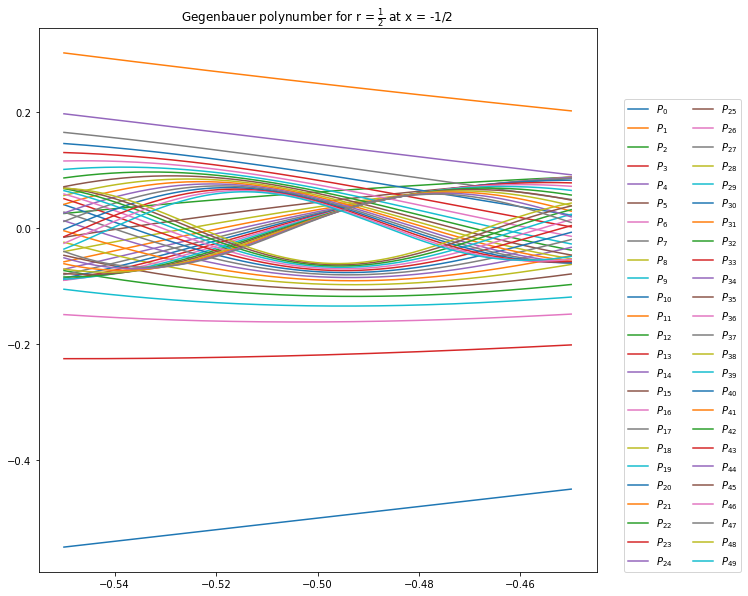

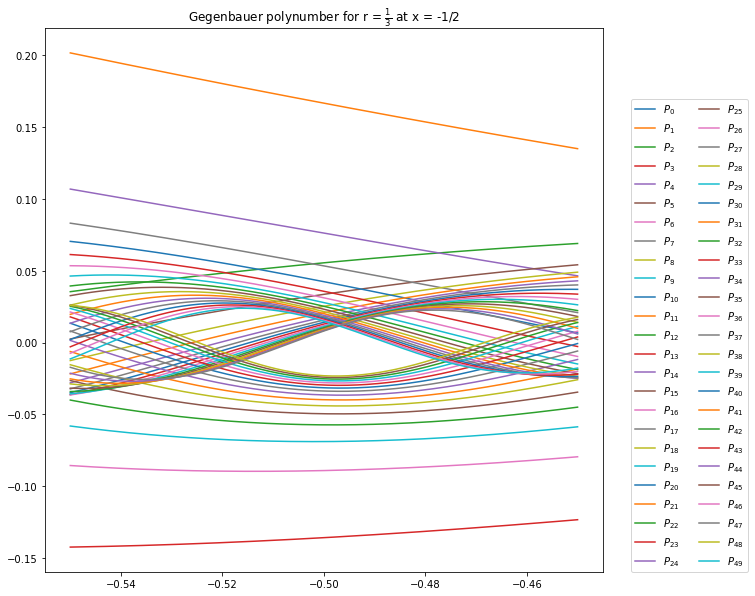

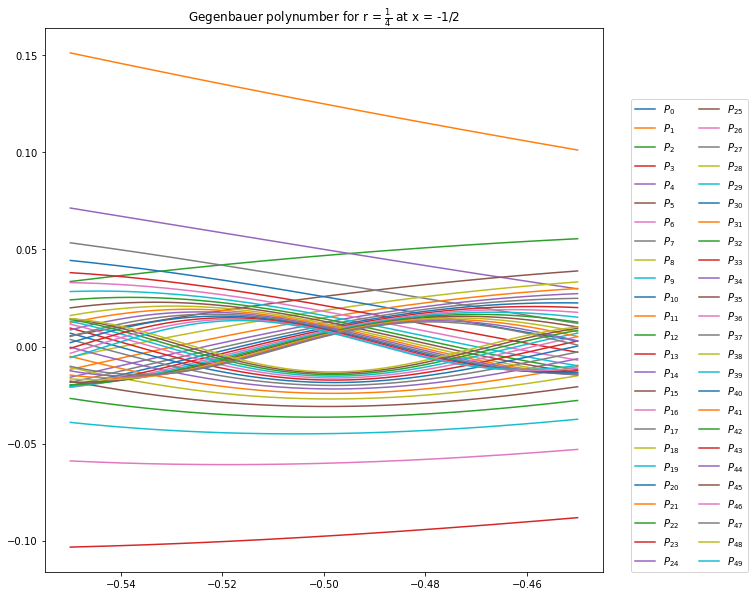

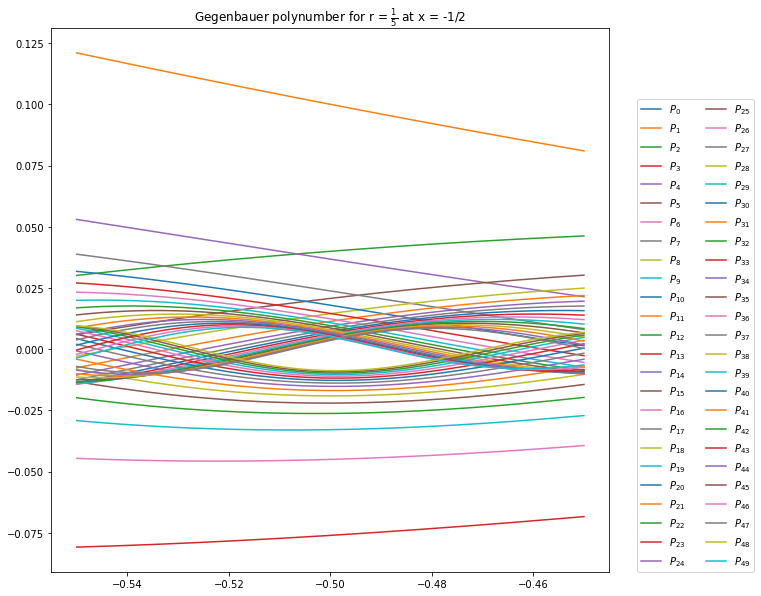

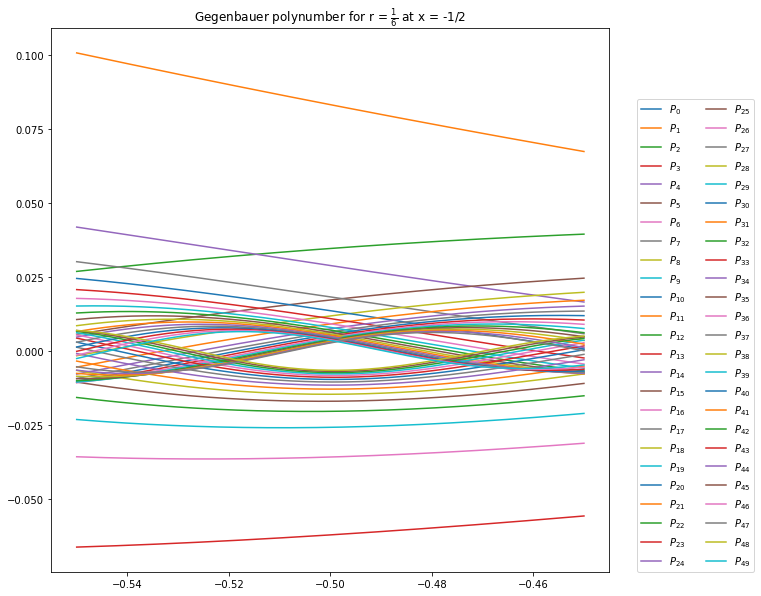

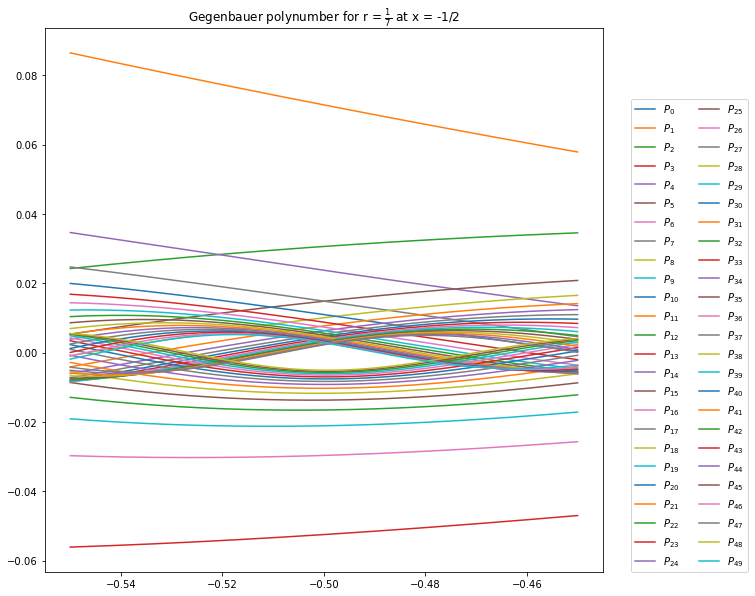

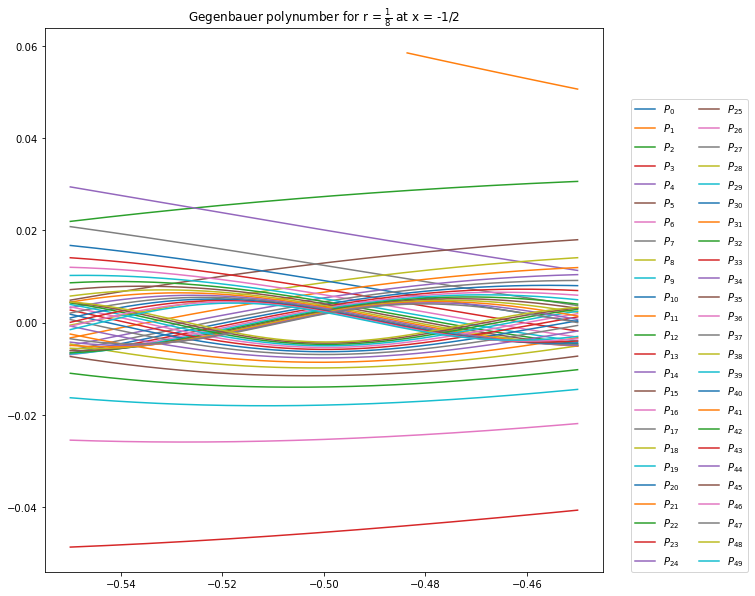

In [5]:
xBounds = [Fraction(-11,20), Fraction(-9,20)]
density = 256
length = 50

for n in range(2,9):
    fig = plt.figure(figsize = (10, 10))
    r = Fraction(1, n)
    m = Gegenbauer(length, r)
    yBounds = [Fraction(-2**(n-1),3**(n-1)), Fraction(2**(n-1),3**(n-1))]
    for row in range(length):
        x, y = getPoints(density, xBounds, yBounds, m[row,:])
        plt.plot(x, y, label=r'$P_{'+str(row)+r'}$')
    plt.legend(loc=(1.05, 0), ncol=2)
    plt.title(r'Gegenbauer polynumber for r = $\frac{'+str(r.numerator)+r'}{'+str(r.denominator)+'}$ at x = -1/2')
    plt.show()

In [6]:
GEmatrix(15)

Matrix([
[      1,      0,      0,      0,      0,    0,    0,    0,    0,   0,   0,  0,  0, 0, 0],
[      0,      1,      0,      0,      0,    0,    0,    0,    0,   0,   0,  0,  0, 0, 0],
[     -1,      0,      1,      0,      0,    0,    0,    0,    0,   0,   0,  0,  0, 0, 0],
[      0,     -1,      0,      1,      0,    0,    0,    0,    0,   0,   0,  0,  0, 0, 0],
[    1/2,      0,     -1,      0,      1,    0,    0,    0,    0,   0,   0,  0,  0, 0, 0],
[      0,    1/2,      0,     -1,      0,    1,    0,    0,    0,   0,   0,  0,  0, 0, 0],
[   -1/6,      0,    1/2,      0,     -1,    0,    1,    0,    0,   0,   0,  0,  0, 0, 0],
[      0,   -1/6,      0,    1/2,      0,   -1,    0,    1,    0,   0,   0,  0,  0, 0, 0],
[   1/24,      0,   -1/6,      0,    1/2,    0,   -1,    0,    1,   0,   0,  0,  0, 0, 0],
[      0,   1/24,      0,   -1/6,      0,  1/2,    0,   -1,    0,   1,   0,  0,  0, 0, 0],
[ -1/120,      0,   1/24,      0,   -1/6,    0,  1/2,    0,   -1,   0,   1,  0,  

In [7]:
Ematrix(15)

Matrix([
[1,   0,   0,   0,   0,    0,    0,     0,     0,      0,       0,        0,        0,         0,          0],
[0, 1/2,   0,   0,   0,    0,    0,     0,     0,      0,       0,        0,        0,         0,          0],
[0,   0, 1/2,   0,   0,    0,    0,     0,     0,      0,       0,        0,        0,         0,          0],
[0,   0,   0, 3/4,   0,    0,    0,     0,     0,      0,       0,        0,        0,         0,          0],
[0,   0,   0,   0, 3/2,    0,    0,     0,     0,      0,       0,        0,        0,         0,          0],
[0,   0,   0,   0,   0, 15/4,    0,     0,     0,      0,       0,        0,        0,         0,          0],
[0,   0,   0,   0,   0,    0, 45/4,     0,     0,      0,       0,        0,        0,         0,          0],
[0,   0,   0,   0,   0,    0,    0, 315/8,     0,      0,       0,        0,        0,         0,          0],
[0,   0,   0,   0,   0,    0,    0,     0, 315/2,      0,       0,        0,        0,         0,      